In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np 
import pandas as pd

from Modeller import Modeller

import seaborn as sns
import matplotlib.pyplot as plt 

from smoother import Smoother

# Prepare Demand price

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date'>

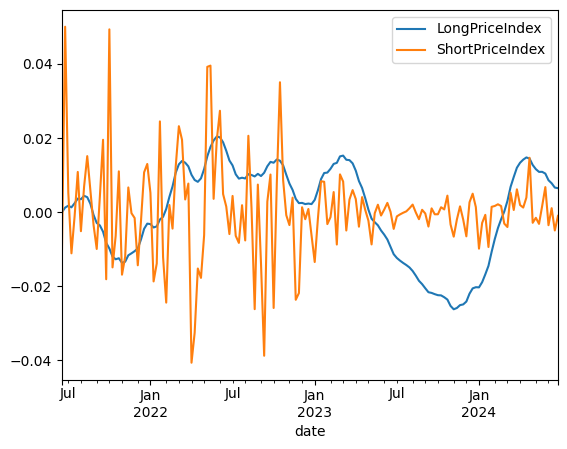

In [252]:
# Price Index
price_index_imputed = Smoother().Impute(data['PriceIndex'].values)


long_price_index = Smoother().Smooth(price_index_imputed, method='MCMC')
short_price_index = price_index_imputed - long_price_index

data['LongPriceIndex'] = long_price_index - long_price_index[0]
data['ShortPriceIndex'] = short_price_index

data[['LongPriceIndex', 'ShortPriceIndex']].plot.line()

# Brand Model

Берем модель M2 без радио но с ООН. ООН переоценен но ни на что другое не влияет

## M1  все медиа как есть

In [19]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx', index_col='date')

In [20]:
spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH', 'Radio'],
        'media_competitors': ['CompetsMedia'],
    }
}

In [21]:
m1 = Modeller("Brand").PrepNoFit(data, spec)
m1.Fit(data, spec)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [22]:
decomp = m1.GetDecomposition()#.plot.line()
decomp.head()

base media_own                                                \
                   0   TV Yoga TV fig skates TV Launch TV 220 pack TV Skates   
date                                                                           
2021-06-21  0.808200  0.000000           0.0       0.0         0.0       0.0   
2021-06-28  0.807710  0.004395           0.0       0.0         0.0       0.0   
2021-07-05  0.806250  0.008014           0.0       0.0         0.0       0.0   
2021-07-12  0.803287  0.010618           0.0       0.0         0.0       0.0   
2021-07-19  0.798056  0.012565           0.0       0.0         0.0       0.0   

                                                            media_competitors  \
           TV NCP promo       OLV Digital other   OOH Radio      CompetsMedia   
date                                                                            
2021-06-21          0.0  0.000107       0.002746  0.0   0.0         -0.000028   
2021-06-28          0.0  0.001495       0.004392  0.0   0.0         -0.000733   
2021-07-05          0.0  0.002879       0.005382  0.0   0.0         -0.001804   
2021-07-12          0.0  0.004055       0.006069  0.0   0.0         -0.002963   
2021-07-19          0.0  0.004787       0.006577  0.0   0.0         -0.004106   

                   y  
                   0  
date                  
2021-06-21  0.810014  
2021-06-28  0.816227  
2021-07-05  0.820914  
2021-07-12  0.822085  
2021-07-19  0.818903

In [10]:
m1.PlotFit()
m1.PlotDecomposition()
m1.PlotMediaDecomposition()

In [213]:
samples = brand_model.GetSamples()
samples.keys()

dict_keys(['base', 'base_drift_scale', 'base_init', 'comp_media_beta', 'comp_media_retention', 'media', 'media_beta', 'media_retention', 'noise_scale'])

<Axes: ylabel='Count'>

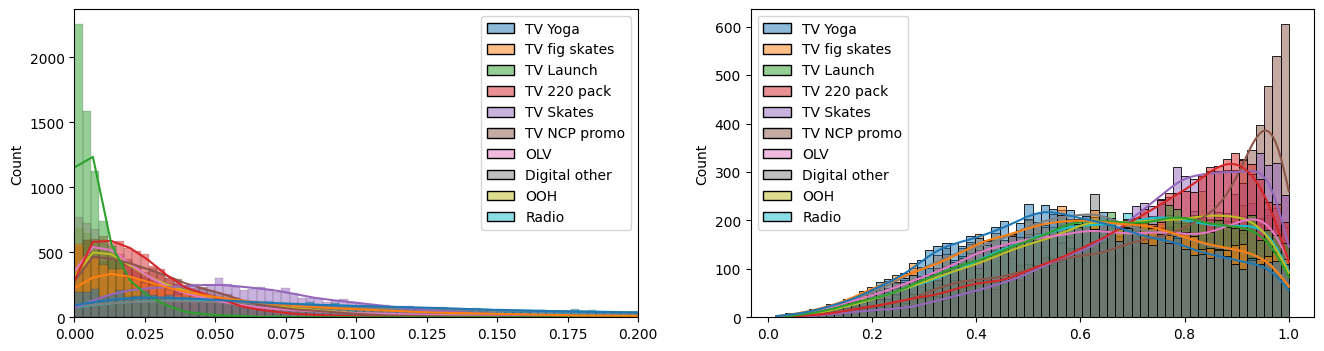

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(pd.DataFrame(samples['media_beta'], columns=brand_model.spec['X']['media_own']), kde=True, ax=axs[0])
axs[0].set_xlim(0, 0.2)
sns.histplot(pd.DataFrame(samples['media_retention'], columns=brand_model.spec['X']['media_own']), kde=True, ax=axs[1])

## M2 убрали радио

In [49]:
spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'Digital', 'OOH'],
        'media_competitors': ['CompetsMedia'],
    }
}

m2 = Modeller("Brand").Fit(data, spec)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

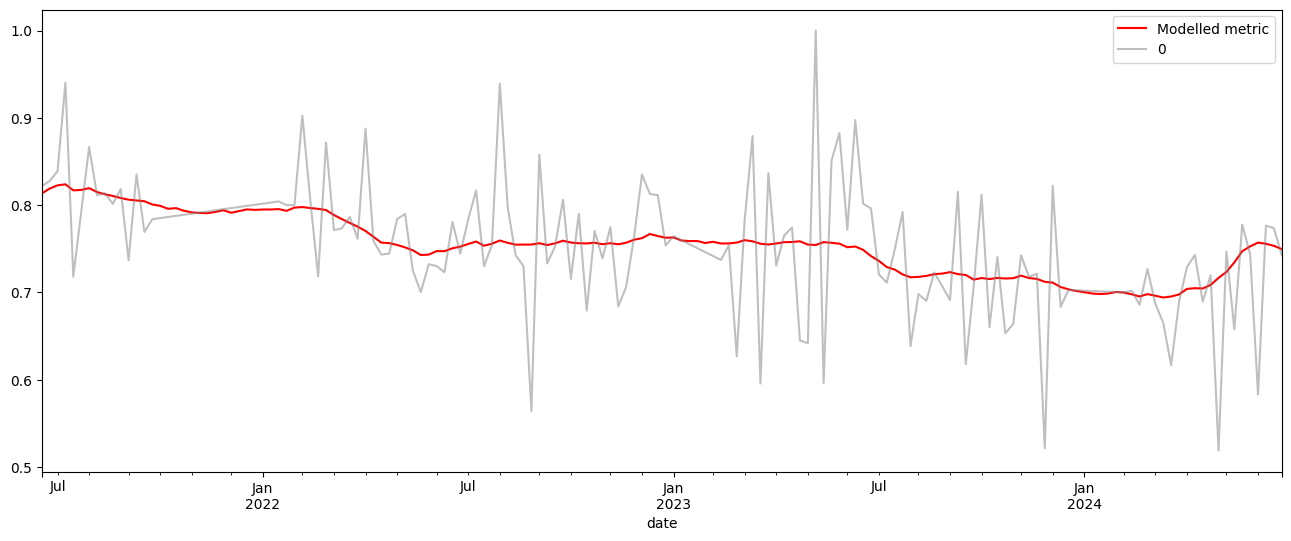

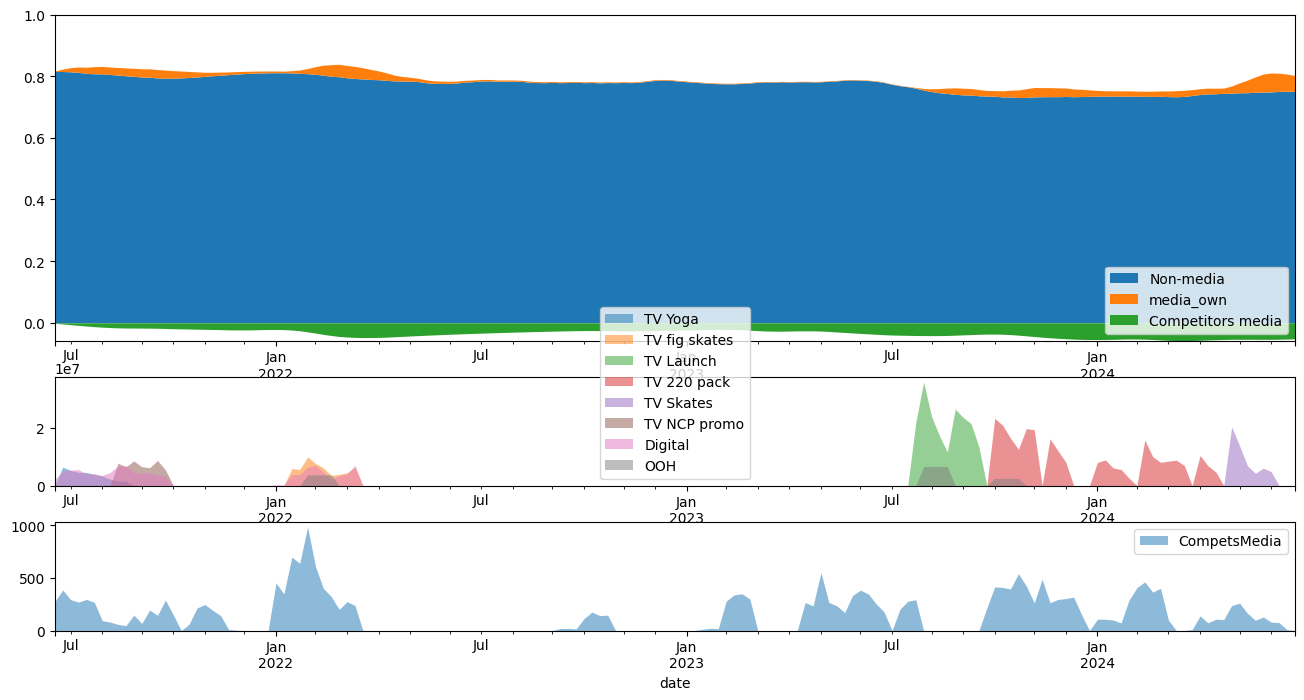

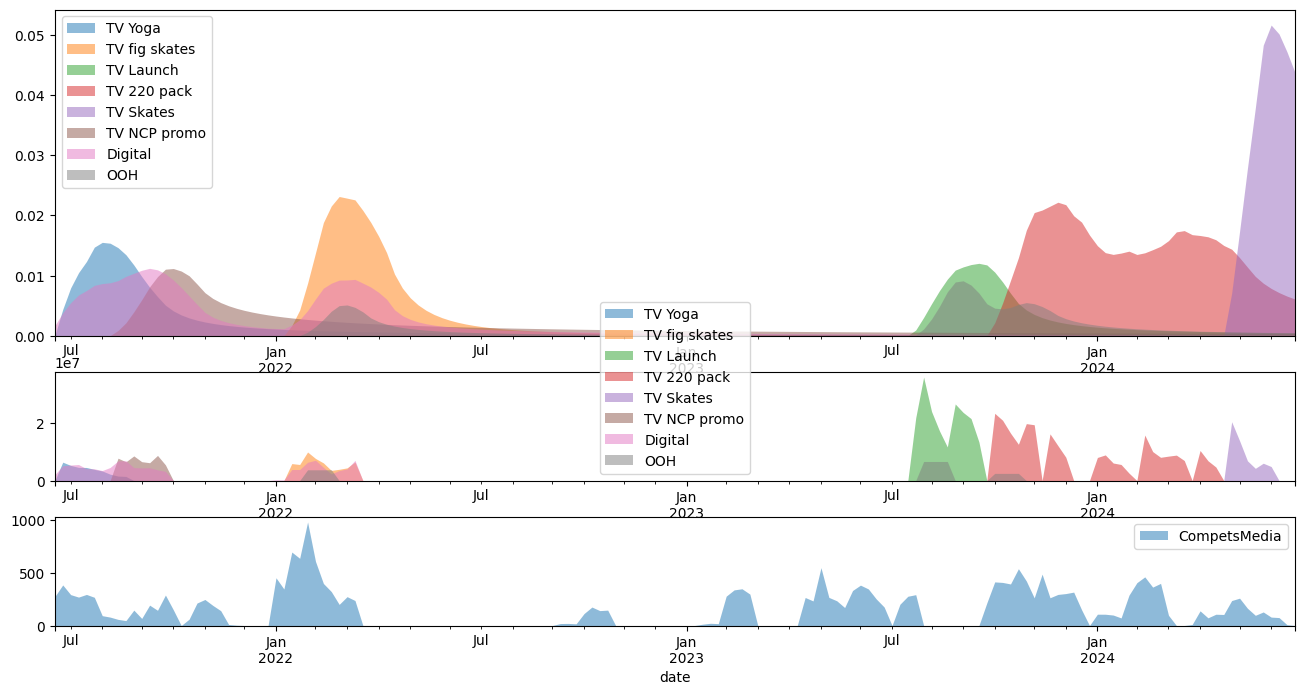

In [50]:
m2.PlotFit()
m2.PlotDecomposition()
m2.PlotMediaDecomposition()

<Axes: ylabel='Count'>

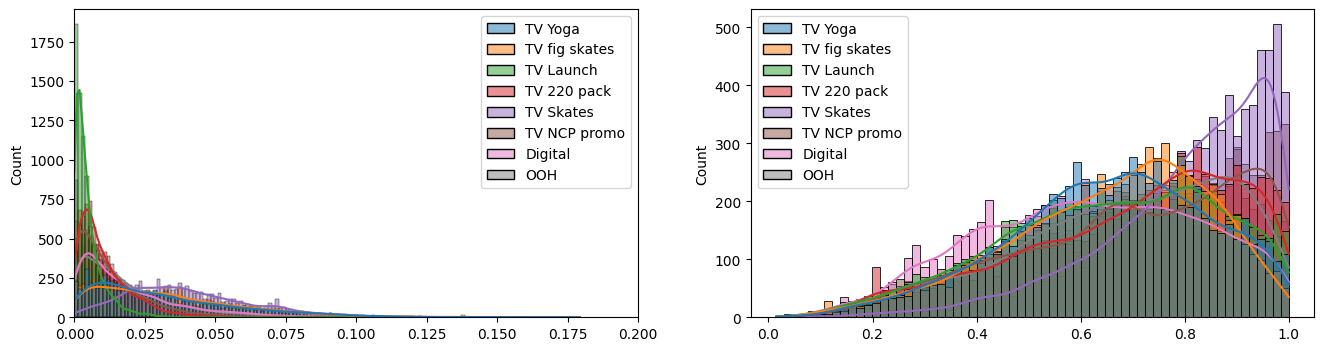

In [51]:
samples = m2.GetSamples()
M = m2

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(pd.DataFrame(samples['media_beta'], columns=M.spec['X']['media_own']), kde=True, ax=axs[0])
axs[0].set_xlim(0, 0.2)
sns.histplot(pd.DataFrame(samples['media_retention'], columns=M.spec['X']['media_own']), kde=True, ax=axs[1])

## M3 убрали ООН

In [44]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx')
data.index = data['date']

spec = {
    'y': ['Brand'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'Digital'],
        'media_competitors': ['CompetsMedia'],
    }
}

m3 = Modeller("Brand").Fit(data, spec)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

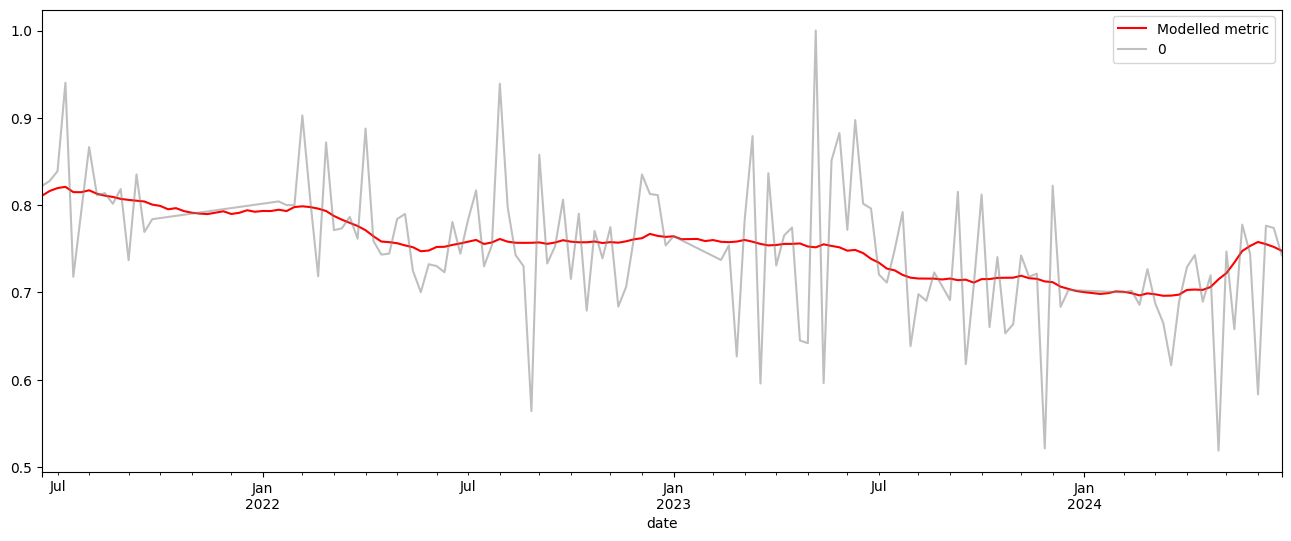

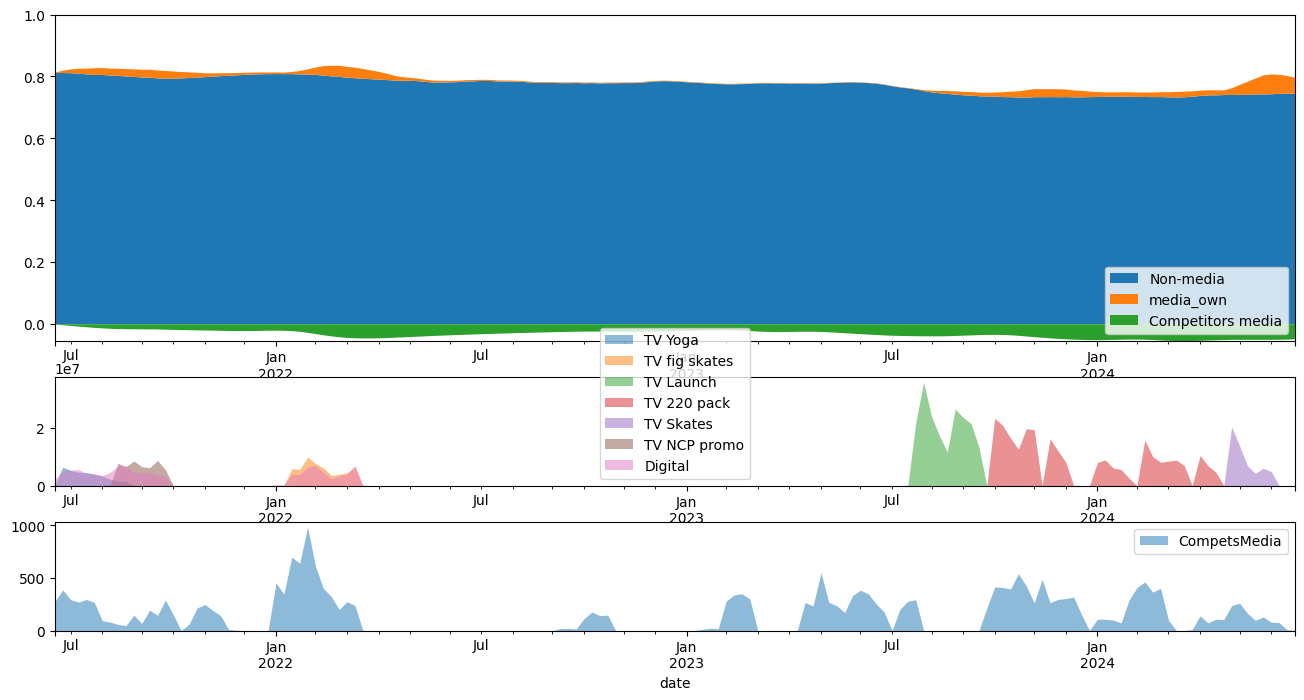

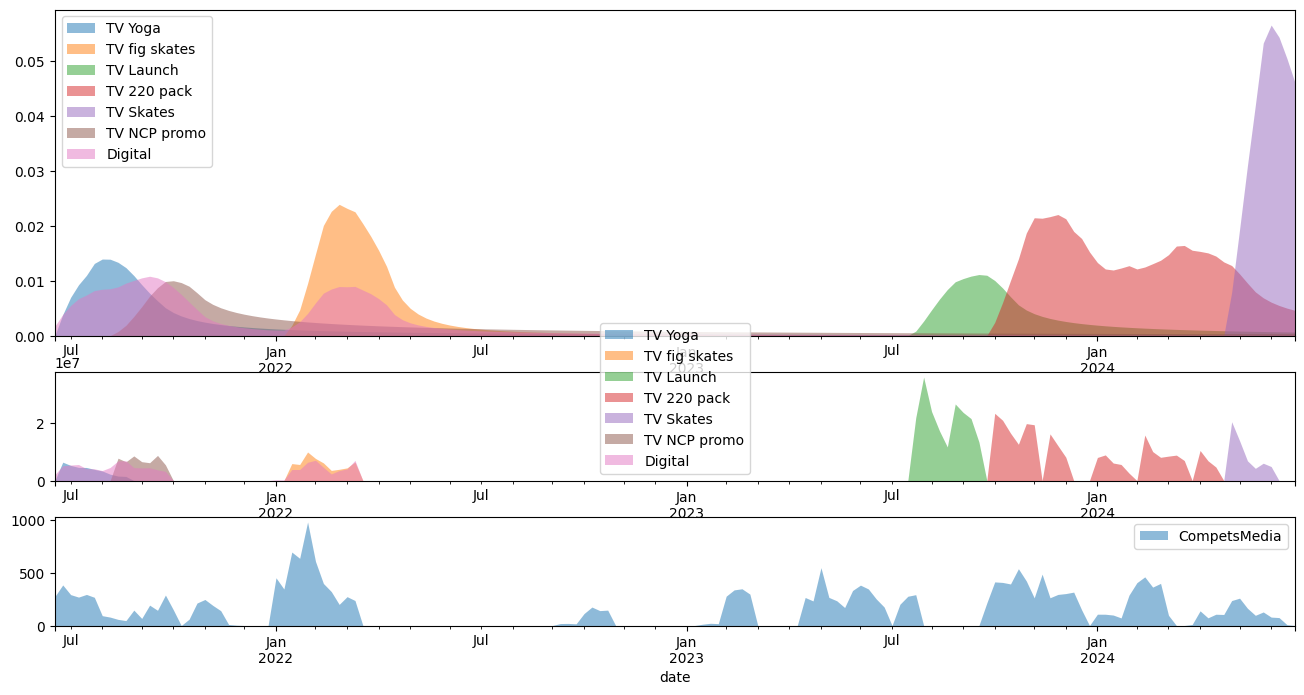

In [45]:
m3.PlotFit()
m3.PlotDecomposition()
m3.PlotMediaDecomposition()

## Get brand base

In [53]:
final_brand_model = m2

<Axes: xlabel='date', ylabel='0'>

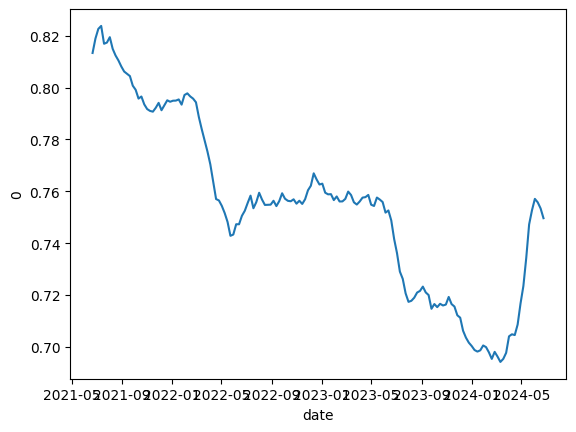

In [59]:
brand_metric = final_brand_model.decomposition['y'][0]
sns.lineplot(brand_metric)

# Final Model

In [2]:
data_folder = "../2024 danone/"
data = pd.read_excel(data_folder + 'data.xlsx')
data.index = data['date']

## Additional vars

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date', ylabel='Category'>

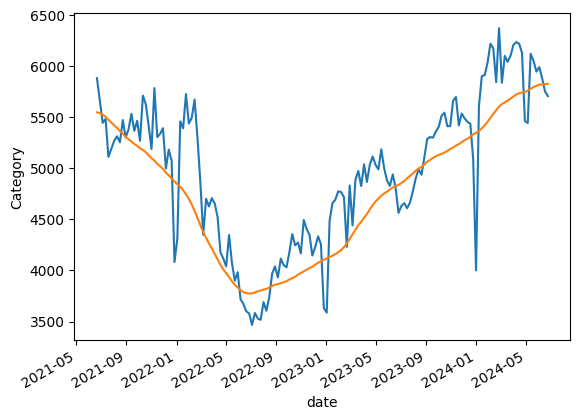

In [67]:
# move brand to data
data['Brand modeled'] = brand_metric

# category demand
sns.lineplot(data['Category'])
data['Demand'] = Smoother().Smooth(data['Category'].values, method='MCMC', seasonality=52)
data['Demand'].plot.line()

fitting smoother...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

... done


<Axes: xlabel='date'>

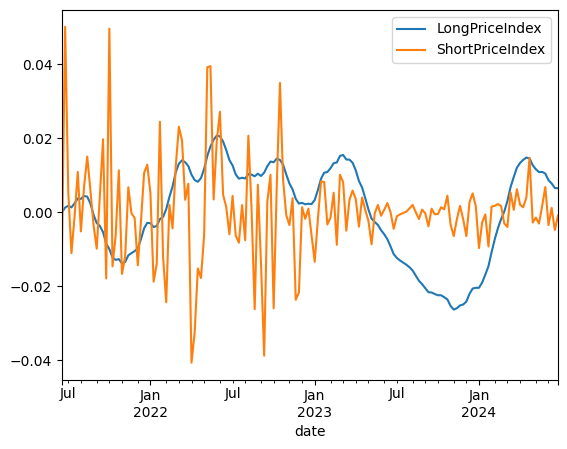

In [68]:
# Price Index
price_index_imputed = Smoother().Impute(data['PriceIndex'].values)

long_price_index = Smoother().Smooth(price_index_imputed, method='MCMC')
short_price_index = price_index_imputed - long_price_index

data['LongPriceIndex'] = long_price_index - long_price_index[0]
data['ShortPriceIndex'] = short_price_index

data[['LongPriceIndex', 'ShortPriceIndex']].plot.line()

## data file with extras

In [36]:
#data.to_excel(data_folder + 'full_data.xlsx')
data = pd.read_excel(data_folder + 'full_data.xlsx', index_col='date')
data.head()

,TV Yoga,TV fig skates,TV Launch,TV 220 pack,TV Skates,TV NCP promo,OLV,Digital other,OOH,Radio,...,Category,CompetsMedia,PromoPercent,Digital,OOH old,OOH new,Brand modeled,Demand,LongPriceIndex,ShortPriceIndex
date,,,,,,,,,,,,,,,,,,,,,
2021-06-21,NaN,NaN,NaN,NaN,NaN,NaN,1.322187e+05,1.925544e+06,NaN,NaN,...,5882.777017,275.164170,0.818684,2.057762e+06,NaN,NaN,0.813376,5548.090332,0.000000,-0.010424
2021-06-28,6.350031e+06,NaN,NaN,NaN,NaN,NaN,3.400359e+06,1.722387e+06,NaN,NaN,...,5663.366536,384.805850,0.796927,5.122745e+06,NaN,NaN,0.818947,5542.074219,0.001255,0.050045
2021-07-05,5.232049e+06,NaN,NaN,NaN,NaN,NaN,3.942284e+06,1.423433e+06,NaN,NaN,...,5445.539634,293.025643,0.767696,5.365717e+06,NaN,NaN,0.822666,5527.208984,0.001733,0.005353
2021-07-12,4.552183e+06,NaN,NaN,NaN,NaN,NaN,4.073557e+06,1.461453e+06,NaN,NaN,...,5482.488767,269.542802,0.723108,5.535010e+06,NaN,NaN,0.823816,5505.040039,0.001300,-0.011056
2021-07-19,4.519352e+06,NaN,NaN,NaN,NaN,NaN,2.654426e+06,1.448619e+06,NaN,NaN,...,5112.499507,294.781437,0.745292,4.103046e+06,NaN,NaN,0.816927,5474.071289,0.002382,-0.001034


## Model 1

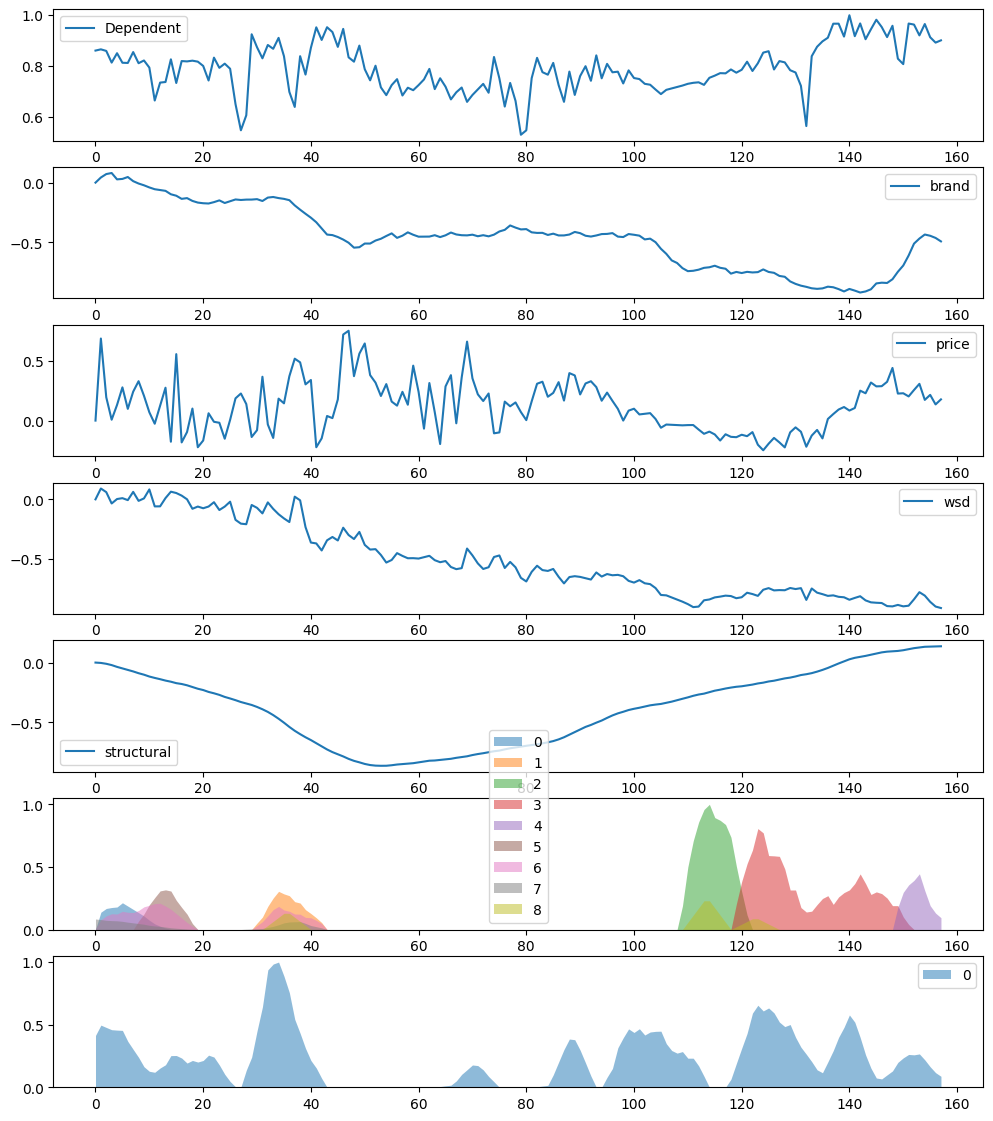

In [59]:
spec = {
    'y': ['Volume'], 
    'X' : {
        'media_own': ['TV Yoga', 'TV fig skates', 'TV Launch', 'TV 220 pack', 'TV Skates', 'TV NCP promo', 'OLV', 'Digital other ', 'OOH'],
        'media_competitors': ['CompetsMedia'],
        'price': ['PriceIndex'],
        'brand': ['Brand modeled'],
        'structural': ['Demand'],
        'wsd': ['CWSD']
    }
}
sm1 = Modeller("Sales", seasonality=52).PrepNoFit(data, spec)
sm1.PlotInputs()

In [70]:
sm1 = Modeller("Sales", seasonality=52).Fit(data, spec, num_samples=2000)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

In [72]:
sm1.GetDecomposition().to_excel(data_folder + 'delete.me.xlsx')

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'Competitors media' contains both positive and negative values

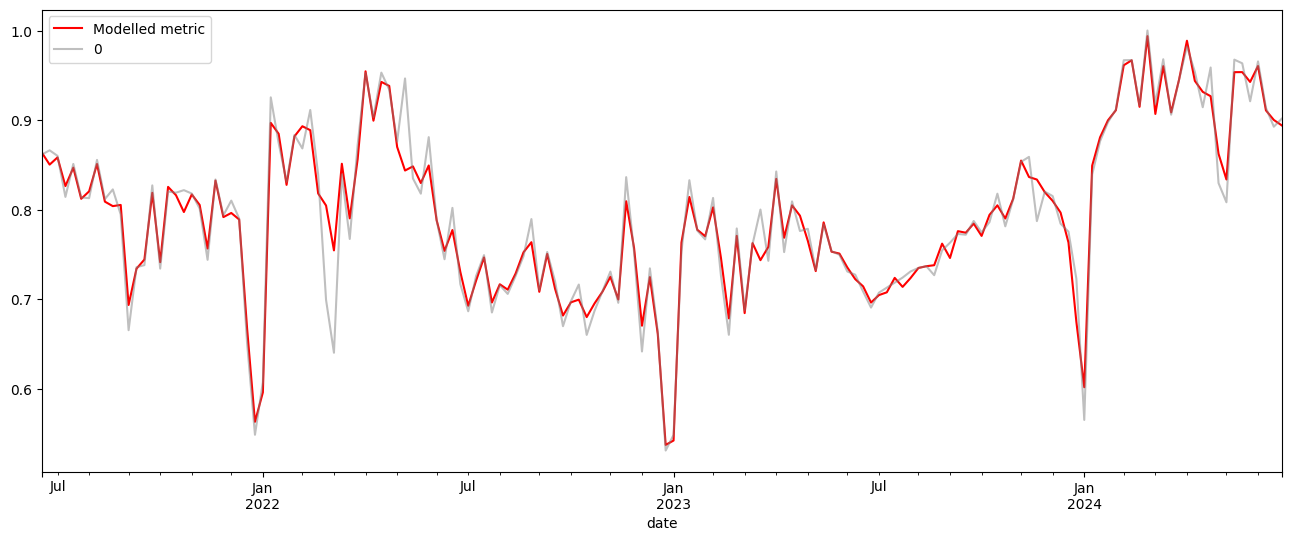

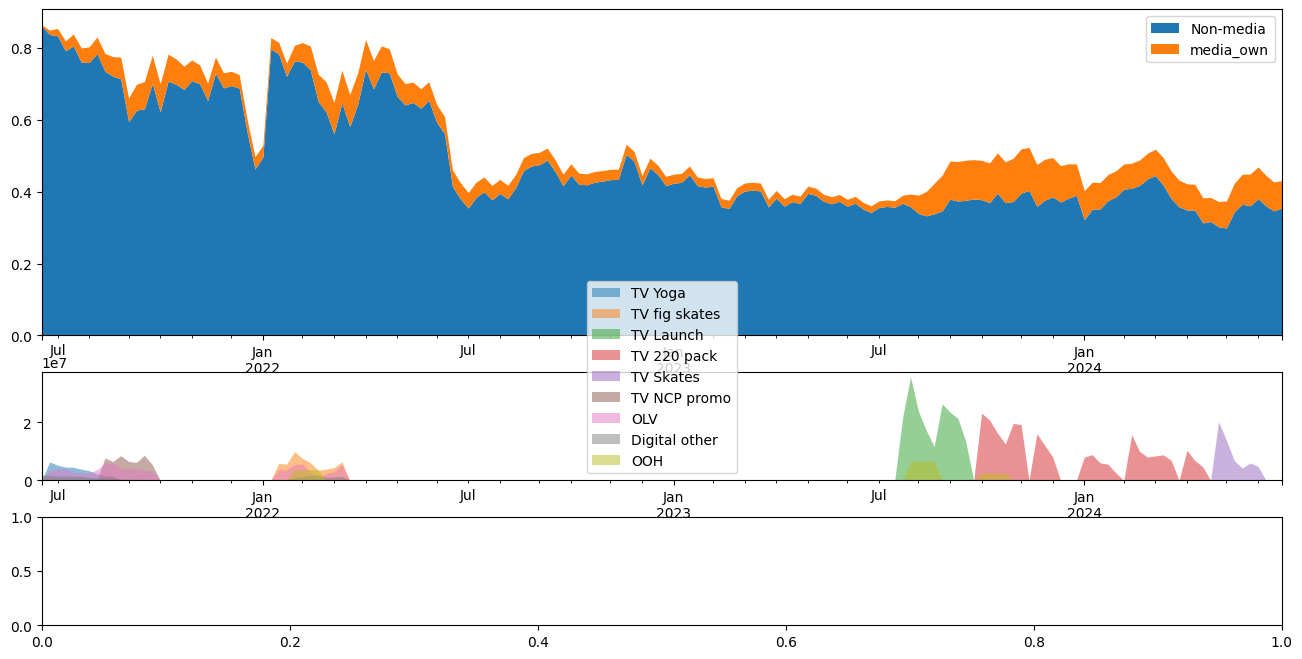

In [62]:
sm1.PlotFit()
sm1.PlotDecomposition()
sm1.PlotNonmediaDecomposition()